In [1]:
#Se trata de una red neuronal que reproduzca dos funciones en el intervalo [-1, 1]
#también se grafica la red junto la gráfica de la función

#Inciso a) 3sin(xpi)
#Inciso b) 1+2x+4x^3

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, Reshape, Layer
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
loss_tracker = keras.metrics.Mean(name="loss")
class Function(Sequential):
    @property
    def metrics(self):
        return [keras.metrics.Mean(name="loss")] #igual cambia el loss_tracker

    def train_step(self, data):
        def funcA(x):
            return tf.math.sin(np.pi*x)*3

        def funcB(x):
            return 1 + 2*x + 4*x**3
        batch_size =100 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = funcB(x)


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [4]:
model = Function([
    Dense(10, activation="tanh", input_shape=(1,)),
    Dense(5, activation="tanh"),
    Dense(1)
])

model.summary()

Model: "function"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x = tf.linspace(-1, 1, 500)
y = 3*np.sin(np.pi*x)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['loss'])

history = model.fit(x, y, epochs=10000, batch_size=1, verbose=0)
plt.plot(history.history["loss"])

16/16 [==============================] - 0s 1ms/step


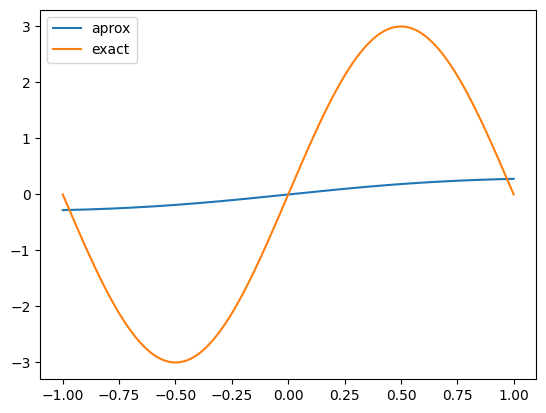

In [ ]:
a=model.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, tf.math.sin(np.pi*x)*3, label="exact")
plt.legend()
plt.show()

In [ ]:
model = Function([
    Dense(10, activation="tanh", input_shape=(1,)),
    Dense(5, activation="tanh"),
    Dense(1)
])

model.summary()

Model: "function_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 5)                 55        
                                                                 
 dense_24 (Dense)            (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x=tf.linspace(-1, 1, 100)
model.compile(optimizer='adam', metrics=['loss'])

history = model.fit(x, epochs=10000, verbose=0)
plt.plot(history.history["loss"])

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1375, in run_step  **
        with tf.control_dependencies(_minimum_control_deps(outputs)):

    TypeError: Can not convert a NoneType into a Tensor or Operation.


4/4 [==============================] - 0s 3ms/step


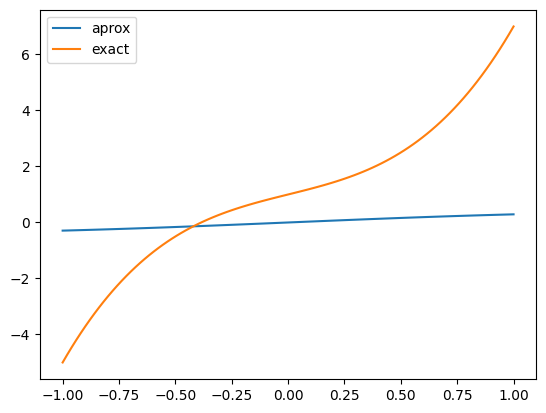

In [ ]:
a=model.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, 1 + 2*x + 4*x**3 , label="exact")
plt.legend()
plt.show()